In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [68]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)

# **Load the dataset**

In [69]:
df = pd.read_csv('statistella/train.csv')
df.head(5)

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196348,0,Cash loans,F,N,Y,2,225000.0,785398.5,33403.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-13629,-514,-7712.0,-2405,NaN,1,1,0,1,0,0,NaN,4.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,NaN,0.726410,0.513694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-707.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,147976,0,Cash loans,M,N,Y,0,90000.0,592560.0,35937.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-11983,-1863,-11266.0,-3484,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.298043,NaN,0.1845,0.0881,0.9841,0.7824,0.0928,0.2000,0.1724,0.3333,0.3750,0.0389,0.1505,0.1718,0.0000,0.0000,0.1880,0.0914,0.9841,0.7909,0.0937,0.2014,0.1724,0.3333,0.3750,0.0398,0.1644,0.1790,0.0000,0.0000,0.1863,0.0881,0.9841,0.7853,0.0934,0.20,0.1724,0.3333,0.3750,0.0396,0.1531,0.1749,0.0000,0.0000,reg oper spec account,block of flats,0.1859,Panel,No,3.0,0.0,3.0,0.0,-93.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,52662,0,Revolving loans,F,N,Y,1,126000.0,202500.0,10125.0,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15182,-2033,-4189.0,-4115,NaN,1,1,1,1,1,0,Sales staff,3.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.573605,0.429424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1753.0,0,0,0,0,0,0,0,0,

# **Define columns**

In [70]:
document_cols = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]
credit_bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]
cols_to_check = document_cols + credit_bureau_cols

# **STEP 1: Data Understanding**

## **1.1. Data Description**

### **FLAG_DOCUMENT_2 - FLAG_DOCUMENT_21**

***General description***

In the dataset used for credit risk analysis in Microfinance Institutions (MFIs), the variables `FLAG_DOCUMENT_2` to `FLAG_DOCUMENT_21` indicate whether a borrower submitted (1) or did not submit (0) a specific type of verification document during the loan application process.

These variables are all binary and reflect the completeness of the application file as well as the borrower’s ability to provide evidence of identity, income stability, asset ownership, or financial history.

***Why it is not possible to identify each document exactly***

Unlike commercial banks with highly standardized documentation requirements, MFIs often operate in:
- rural or remote areas
- communities with informal or unstable income
- populations lacking formal financial records
- regions with limited administrative infrastructure

As a result, the types and number of documents required by MFIs differ widely.
One MFI may require only 10 documents, while a larger or government-supported MFI may require 20–25 types.

***Examples of how major financial institutions collect documents***
Below are real-world examples of document requirements across MFIs and financial institutions:
- Home Credit Group (global consumer/microfinance institution)
    + National ID or passport
    + Residence verification
    + Bank or mobile wallet statements
    + Asset ownership documents (motorbike, phone, electronics used as collateral)
    + Employment contract or work confirmation
    + Credit bureau records
- M-Pesa (Kenya, Tanzania – microfinance via mobile money)
    + National ID
    + SIM registration verification + transaction history
    + Telecom service contract
    + Residence confirmation provided by local community leaders
- Grameen Bank (Bangladesh)
    + Membership certificate of borrowing group
    + Informal occupation verification (agriculture, handicraft)
    + Group responsibility records (group lending model)
- Kiva, BRAC, and other MFIs supported by the World Bank
    + Household income documentation
    + Rental or housing agreement
    + Land or agricultural property documents
    + Evidence of prior borrowing from NGOs or community lenders

These examples show that documentation is highly diverse and lacks a global standard. Therefore, the dataset encodes them generically as FLAG_DOCUMENT_x.

***Common document groups***
1. Identity and residence documents
2. Income and employment verification
3. Asset documentation
4. Financial history
5. Small business documentation
6. Other supporting documents

### **Credit Bureau Enquiry Variables**

Credit Bureaus are specialized agencies that collect and maintain borrowers’ credit histories, including loans, repayments, defaults, and other financial behaviors. Lenders rely on these bureaus to assess a borrower’s creditworthiness before approving new credit. Accessing a credit bureau report allows financial institutions to make informed lending decisions and manage risk effectively. For example, in Vietnam, CIC (Credit Information Center) provides credit reports to banks and financial institutions for this purpose.

In the dataset, there are six variables capturing credit bureau enquiries over different time horizons:

- `AMT_REQ_CREDIT_BUREAU_HOUR`
- `AMT_REQ_CREDIT_BUREAU_DAY`
- `AMT_REQ_CREDIT_BUREAU_WEEK`
- `AMT_REQ_CREDIT_BUREAU_MON`
- `AMT_REQ_CREDIT_BUREAU_QRT`
- `AMT_REQ_CREDIT_BUREAU_YEAR`

These variables record the number of times a borrower’s credit history was requested by financial institutions or lenders during the specified time period. Each variable corresponds to a different time frame, ranging from the last few hours up to the past year.

Credit bureau enquiries provide important signals about a borrower’s recent credit-seeking behavior and potential financial stress. A high number of recent enquiries may indicate that the borrower is actively seeking multiple loans, which can be a risk factor for default. These features are commonly used in credit scoring models to improve the prediction of repayment behavior and overall credit risk.

## **1.2. Data Distribution Analysis**

### **FLAG_DOCUMENT_2 - FLAG_DOCUMENT_21**

In [71]:
document_cols = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]

def plot_flag_document_distributions(df, document_cols, max_plots_per_fig=12):
    """
    Vẽ countplot cho các biến FLAG_DOCUMENT_x (binary).
    """    
    print("="*70)
    print("1. FLAG DOCUMENT VARIABLES")
    print("="*70)
    
    flag_vars = [col for col in document_cols if col in df.columns]

    if len(flag_vars) == 0:
        print("⚠️ Không tìm thấy biến FLAG_DOCUMENT_x nào trong dataframe.")
        return
    
    n_vars = len(flag_vars)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten()

    for idx, col in enumerate(flag_vars):
        ax = axes[idx]

        # Count
        counts = df[col].value_counts().sort_index()
        colors = ['#e74c3c', '#2ecc71']
        bars = ax.bar(counts.index, counts.values,
                      color=colors, edgecolor='black',
                      linewidth=1.5, alpha=0.7)

        # Add % labels
        total = counts.sum()
        for bar, value in zip(bars, counts.values):
            ax.text(bar.get_x() + bar.get_width()/2, value,
                    f"{value:,}\n({value/total*100:.3f}%)",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

        ax.set_title(col, fontsize=12, fontweight='bold')
        ax.set_xlabel("Value")
        ax.set_ylabel("Count")
        ax.set_xticks([0, 1])

        # imbalance warning
        if 1 in counts and 0 in counts:
            ratio = counts.min() / counts.max()
            if ratio < 0.01:
                ax.text(0.5, 0.95, "⚠️ HIGHLY IMBALANCED",
                        transform=ax.transAxes, ha='center', va='top',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                        fontsize=9, fontweight='bold')

    # Hide empty subplot
    for idx in range(n_vars, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.savefig("1_flag_document_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Summary
    summary_rows = []

    for col in flag_vars:
        counts = df[col].value_counts()
        count_0 = counts.get(0, 0)
        count_1 = counts.get(1, 0)

        # Check ratio
        if count_0 > 0 and count_1 > 0:
            ratio = min(count_0, count_1) / max(count_0, count_1)
            imbalance = "⚠️ HIGHLY IMBALANCED" if ratio < 0.01 else ""
        else:
            ratio = None
            imbalance = "Only one value present"

        summary_rows.append({
            "variable": col,
            "count_0": count_0,
            "count_1": count_1,
            "ratio_min_max": ratio,
            "imbalance_flag": imbalance
        })

    summary_df = pd.DataFrame(summary_rows)
    print("\nFlag Document Summary Table:")
    display(summary_df)


1. FLAG DOCUMENT VARIABLES


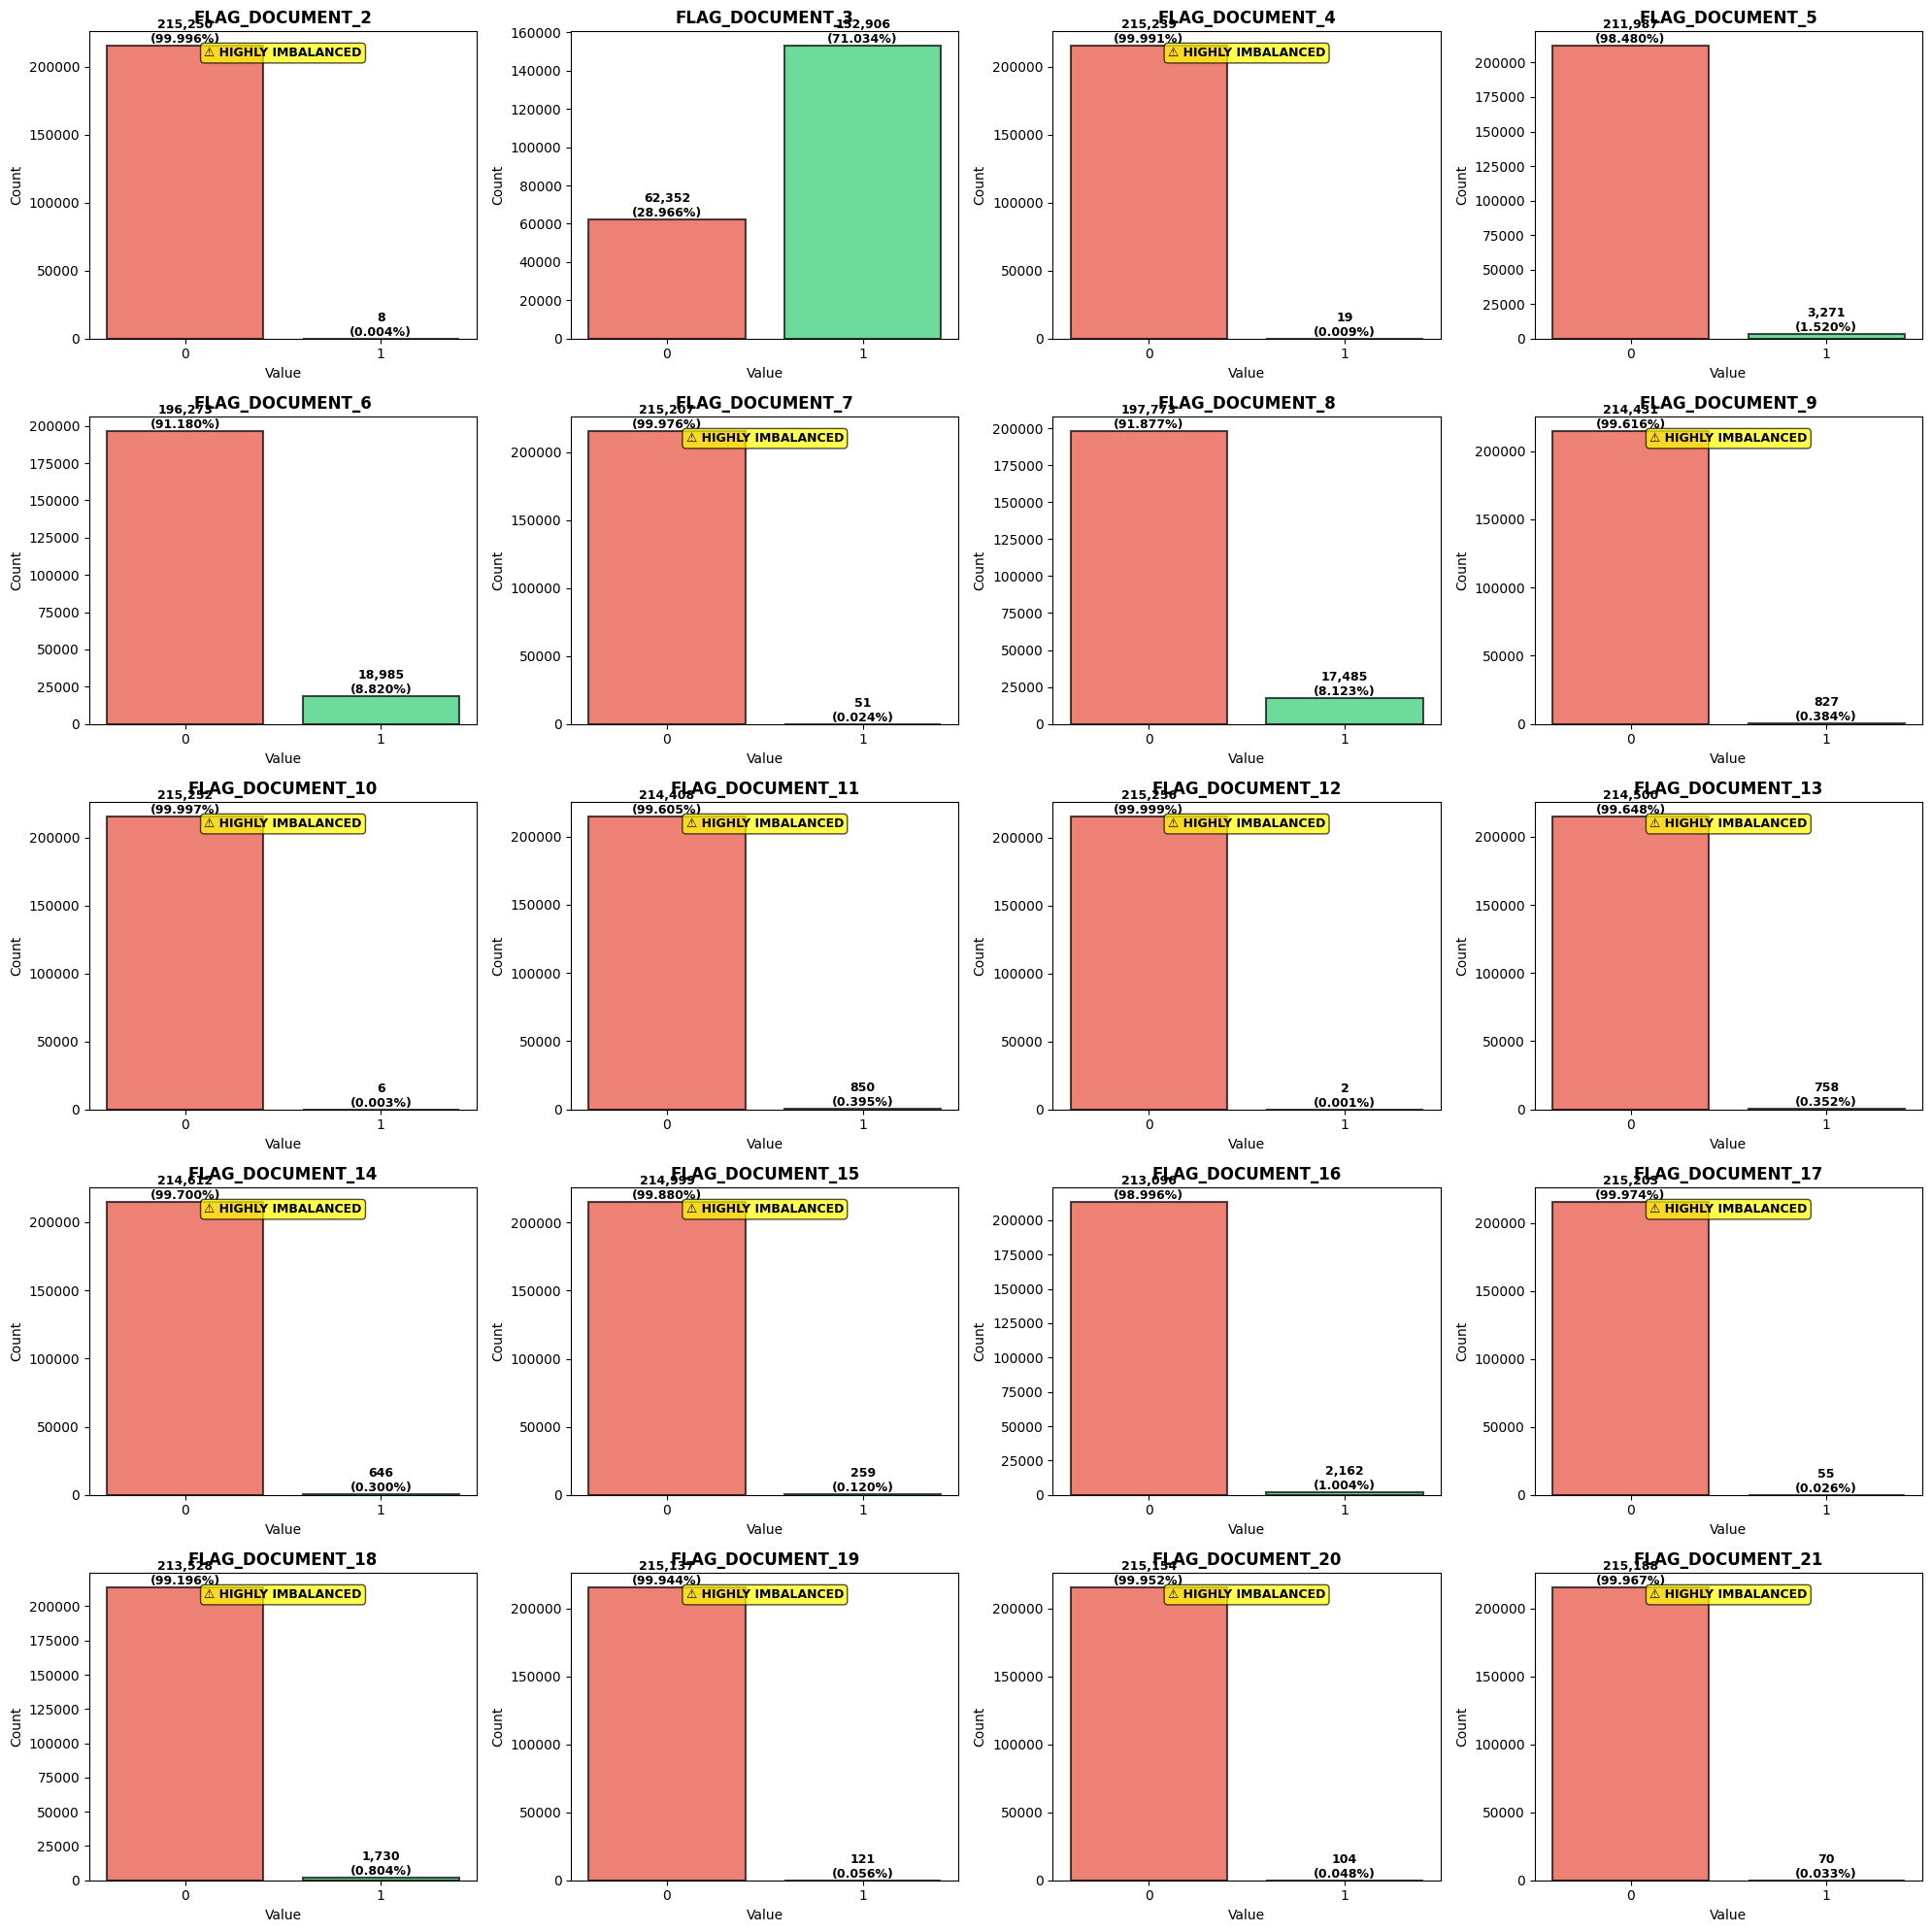


Flag Document Summary Table:


,variable,count_0,count_1,ratio_min_max,imbalance_flag
0,FLAG_DOCUMENT_2,215250,8,0.000037,⚠️ HIGHLY IMBALANCED
1,FLAG_DOCUMENT_3,62352,152906,0.407780,
2,FLAG_DOCUMENT_4,215239,19,0.000088,⚠️ HIGHLY IMBALANCED
3,FLAG_DOCUMENT_5,211987,3271,0.015430,
4,FLAG_DOCUMENT_6,196273,18985,0.096728,
5,FLAG_DOCUMENT_7,215207,51,0.000237,⚠️ HIGHLY IMBALANCED
6,FLAG_DOCUMENT_8,197773,17485,0.088409,
7,FLAG_DOCUMENT_9,214431,827,0.003857,⚠️ HIGHLY IMBALANCED
8,FLAG_DOCUMENT_10,215252,6,0.000028,⚠️ HIGHLY IMBALANCED
9,FLAG_DOCUMENT_11,214408,850,0.003964,⚠️ HIGHLY IMBALANCED


In [72]:
plot_flag_document_distributions(df, document_cols)

**Analysis of Imbalance in FLAG_DOCUMENT Variables**  

***Severe Imbalance in Most Variables***
- **16 out of 20 variables** are *highly imbalanced*, with the positive class (`1`) appearing fewer than **0.1%** of the time.  
- Some extreme cases:
  - `FLAG_DOCUMENT_12`: only **2** occurrences of `1`
  - `FLAG_DOCUMENT_10`: **6** occurrences  
  - `FLAG_DOCUMENT_2`: **8** occurrences  

These variables behave almost like constants and are unlikely to carry meaningful predictive information.

***Why the Imbalance Occurs***
- **Business reason:** Many document types are required only in rare or special loan applications (e.g., collateral documents, legal certificates).
- **Not an error:** No evidence of data entry issues, invalid values, or structural missingness.

***Impact on Modeling***
- Extremely imbalanced binary variables have:
  - Very low variance  
  - Low discriminative power  
  - High risk of overfitting on rare groups  
- Tree-based models may ignore them; linear models may be biased.

Variables with extremely rare `1`s will likely be removed during feature selection.

***Next Steps***
- Evaluate each variable’s relationship with the target using Chi-square test

In [73]:
from scipy.stats import chi2_contingency

def chi_square_test_binary(df, cols, target_col='TARGET'):
    results = []

    for col in cols:
        table = pd.crosstab(df[col], df[target_col])

        if table.shape != (2, 2):
            results.append({
                'variable': col,
                'chi2': None,
                'p_value': None,
                'note': 'Not 2x2 table – skipped'
            })
            continue

        chi2, p, dof, exp = chi2_contingency(table)

        results.append({
            'variable': col,
            'chi2': chi2,
            'p_value': p,
            'note': ''
        })
    
    return pd.DataFrame(results).sort_values('p_value')


# ---- RUN TEST ----
chi_df = chi_square_test_binary(df, document_cols, target_col='TARGET')
chi_df

,variable,chi2,p_value,note
1,FLAG_DOCUMENT_3,420.199260,2.208386e-93,
4,FLAG_DOCUMENT_6,183.991060,6.517205e-42,
14,FLAG_DOCUMENT_16,29.146072,6.712168e-08,
12,FLAG_DOCUMENT_14,22.305696,2.325158e-06,
11,FLAG_DOCUMENT_13,21.472938,3.588574e-06,
6,FLAG_DOCUMENT_8,12.914022,3.261297e-04,
13,FLAG_DOCUMENT_15,9.366010,2.210462e-03,
16,FLAG_DOCUMENT_18,7.626068,5.753060e-03,
0,FLAG_DOCUMENT_2,5.790734,1.611086e-02,
9,FLAG_DOCUMENT_11,4.136380,4.197082e-02,


### **Credit Bureau Enquiry Variables**

In [74]:
def plot_discrete_distributions(df, discrete_cols, max_plots_per_fig=12):
    """
    Vẽ bar chart cho các biến discrete AMT_REQ_CREDIT_BUREAU_*
    """
    print("="*80)
    print("2. DISCRETE CREDIT BUREAU VARIABLES (COUNT REQUESTS)")
    print("="*80)

    # Chỉ lấy các biến thực sự có trong df
    disc_vars = [col for col in discrete_cols if col in df.columns]

    if len(disc_vars) == 0:
        print("⚠️ Không tìm thấy biến discrete nào trong dataframe.")
        return

    n_vars = len(disc_vars)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 5))
    axes = axes.flatten()

    for idx, col in enumerate(disc_vars):
        ax = axes[idx]

        counts = df[col].value_counts().sort_index()

        bars = ax.bar(
            counts.index, 
            counts.values, 
            color='#3498db', 
            edgecolor='black', 
            linewidth=1.2, 
            alpha=0.75
        )

        ax.set_title(col, fontsize=13, fontweight='bold')
        ax.set_xlabel("Value (Number of Bureau Requests)")
        ax.set_ylabel("Count")

    # Tắt subplot thừa
    for idx in range(n_vars, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.savefig("2_discrete_credit_bureau_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()

    # ===============================
    # Summary Table
    # ===============================
    summary_rows = []

    for col in disc_vars:
        counts = df[col].value_counts(normalize=False)
        pct = df[col].value_counts(normalize=True) * 100
        
        mode_val = counts.idxmax()
        mode_pct = pct.loc[mode_val]

        # rare = giá trị chiếm <1%
        rare_values = pct[pct < 1].index.tolist()

        summary_rows.append({
            "variable": col,
            "unique_values": len(counts),
            "mode_value": mode_val,
            "mode_frequency": counts[mode_val],
            "mode_percentage(%)": round(mode_pct, 3),
            "rare_values(<1%)": rare_values
        })

    summary_df = pd.DataFrame(summary_rows)
    print("\n### Discrete Variables Summary Table:")
    display(summary_df)


2. DISCRETE CREDIT BUREAU VARIABLES (COUNT REQUESTS)


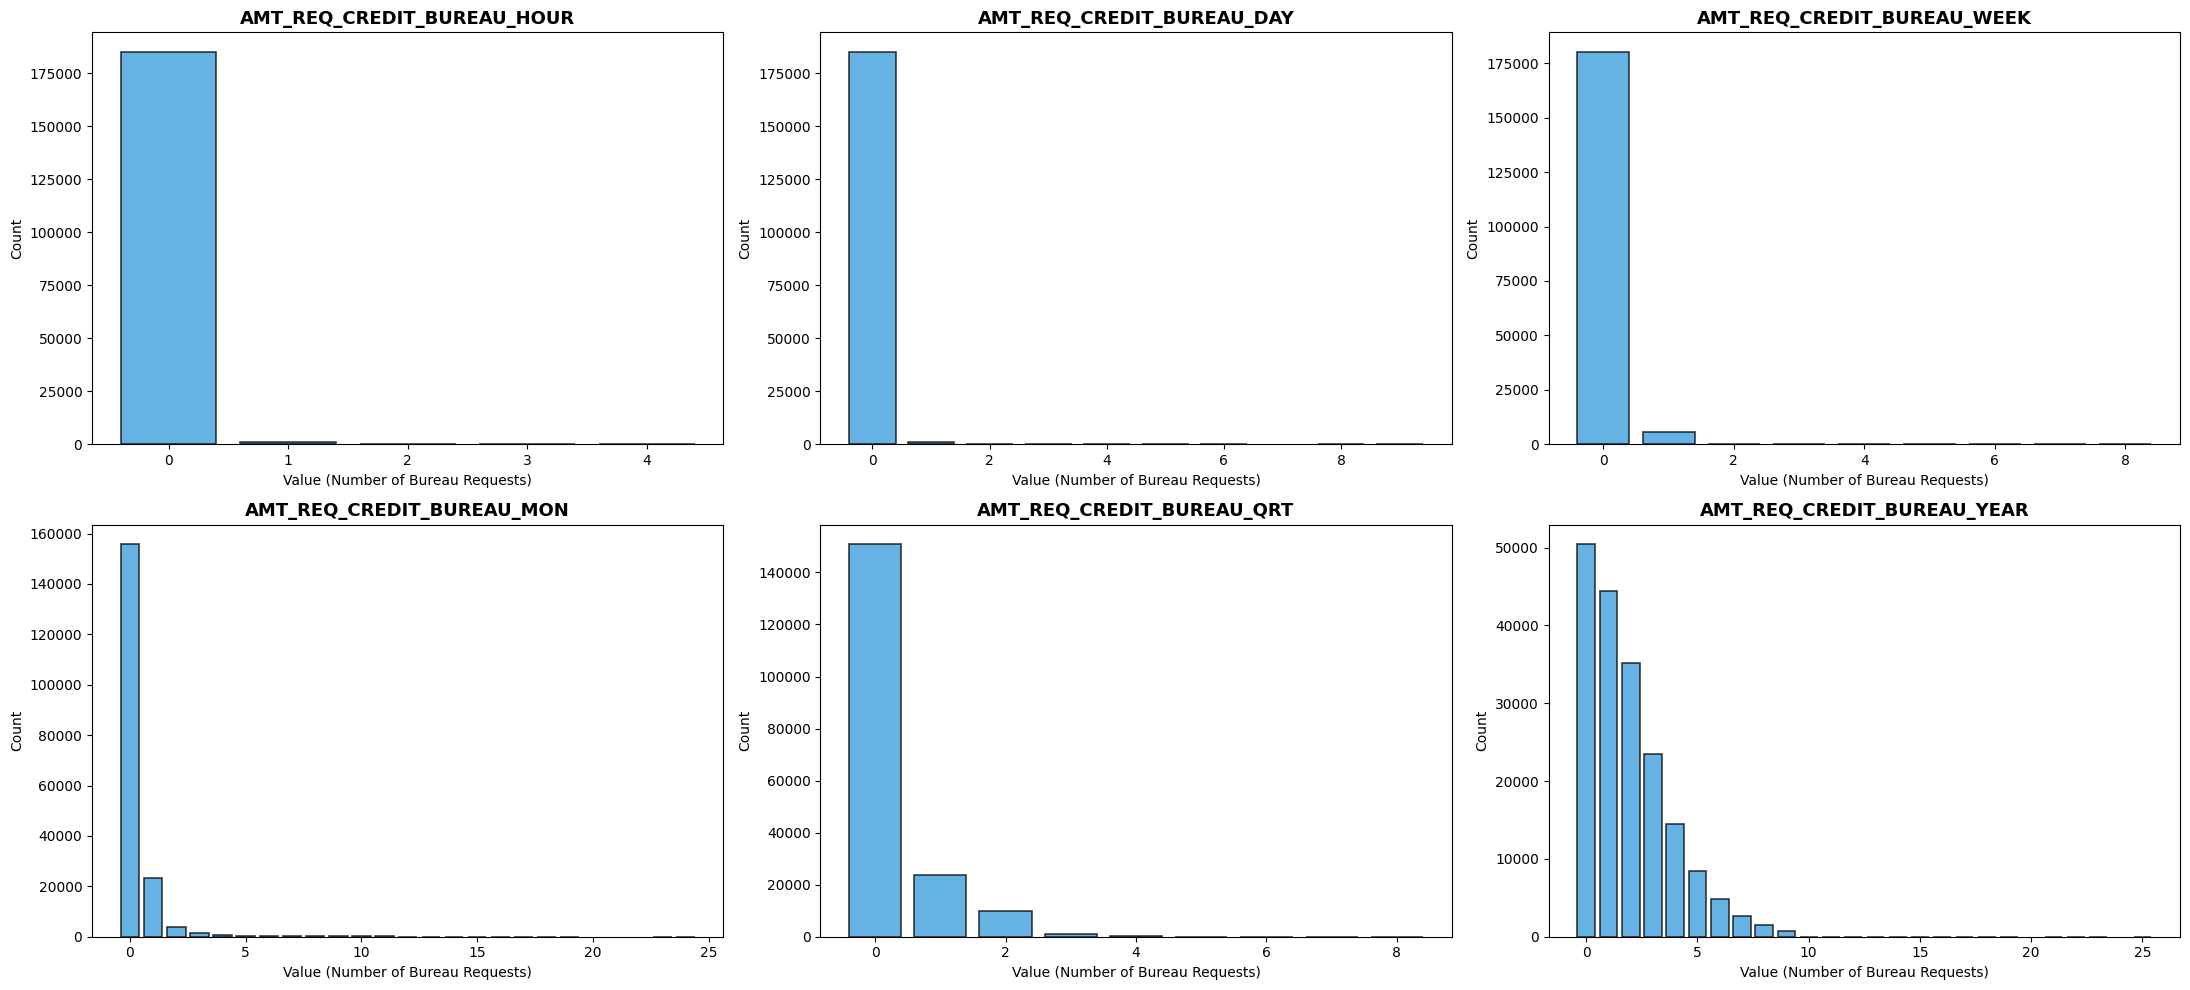


### Discrete Variables Summary Table:


,variable,unique_values,mode_value,mode_frequency,mode_percentage(%),rare_values(<1%)
0,AMT_REQ_CREDIT_BUREAU_HOUR,5,0.0,185043,99.386,"[1.0, 2.0, 3.0, 4.0]"
1,AMT_REQ_CREDIT_BUREAU_DAY,9,0.0,185122,99.429,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0]"
2,AMT_REQ_CREDIT_BUREAU_WEEK,9,0.0,180239,96.806,"[2.0, 3.0, 4.0, 6.0, 5.0, 8.0, 7.0]"
3,AMT_REQ_CREDIT_BUREAU_MON,22,0.0,155674,83.612,"[3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 8.0, 10.0, 11.0..."
4,AMT_REQ_CREDIT_BUREAU_QRT,9,0.0,150751,80.968,"[3.0, 4.0, 5.0, 6.0, 7.0, 8.0]"
5,AMT_REQ_CREDIT_BUREAU_YEAR,24,0.0,50411,27.076,"[8.0, 9.0, 11.0, 12.0, 10.0, 13.0, 14.0, 15.0,..."


In [75]:
plot_discrete_distributions(df, credit_bureau_cols)

**Analysis of the distribution of Credit Bureau Enquiry group**

All six variables are highly right-skewed and dominated by zero values, indicating that most applicants had no recent credit bureau inquiries in the corresponding time window.

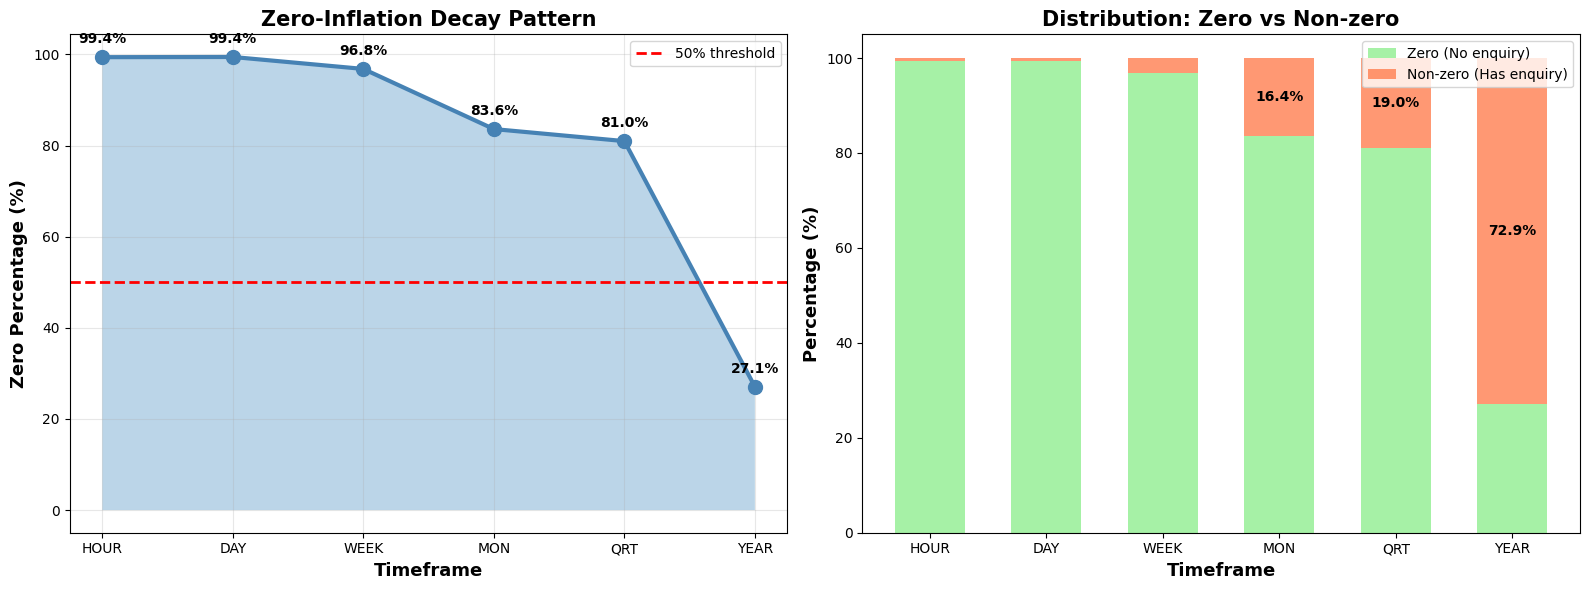

In [76]:
import matplotlib.pyplot as plt
import numpy as np

timeframes = ['HOUR', 'DAY', 'WEEK', 'MON', 'QRT', 'YEAR']
zero_pct = [99.39, 99.43, 96.81, 83.61, 80.97, 27.08]
nonzero_pct = [100 - x for x in zero_pct]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Zero percentage decay
ax1 = axes[0]
ax1.plot(timeframes, zero_pct, marker='o', linewidth=3, markersize=10, color='steelblue')
ax1.fill_between(range(len(timeframes)), zero_pct, alpha=0.3)
ax1.set_ylabel('Zero Percentage (%)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Timeframe', fontsize=13, fontweight='bold')
ax1.set_title('Zero-Inflation Decay Pattern', fontsize=15, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% threshold')

# Add annotations
for i, (tf, pct) in enumerate(zip(timeframes, zero_pct)):
    ax1.annotate(f'{pct:.1f}%', (i, pct), textcoords="offset points", 
                xytext=(0,10), ha='center', fontweight='bold')

ax1.legend()

# Plot 2: Stacked bar - Zero vs Non-zero
ax2 = axes[1]
x = np.arange(len(timeframes))
width = 0.6

bars1 = ax2.bar(x, zero_pct, width, label='Zero (No enquiry)', color='lightgreen', alpha=0.8)
bars2 = ax2.bar(x, nonzero_pct, width, bottom=zero_pct, label='Non-zero (Has enquiry)', 
               color='coral', alpha=0.8)

ax2.set_ylabel('Percentage (%)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Timeframe', fontsize=13, fontweight='bold')
ax2.set_title('Distribution: Zero vs Non-zero', fontsize=15, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(timeframes)
ax2.legend()

# Add percentage labels
for i, (z, nz) in enumerate(zip(zero_pct, nonzero_pct)):
    if nz > 5:  # Only show if visible
        ax2.text(i, z + nz/2, f'{nz:.1f}%', ha='center', va='center', 
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('credit_bureau_zero_inflation.png', dpi=300, bbox_inches='tight')
plt.show()

**Business Interpretation**  
The group of credit enquiries variables reflects the level and frequency of times a customer's credit information has been queried by institutions like CIC, PCB, FICO, etc. This is the first step in the loan application process. Therefore, their distributions carry significant information about the borrowing behavior of the customer.

***1. HOUR & DAY Enquiries***  
`(AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY)`
- **Observation**: >99% of values are equal to 0.
- In reality, no customer submits a subsequent loan application within a few hours or one day after a credit check.
- **Typical Process Flow**:
  1. Customer submits application
  2. Bank checks Credit Bureau
  3. Underwriting (takes a few days)
  4. Disbursement  
  → Customers have no motivation to apply again within hours or 24h.
- **Business Implication**  
  Values > 0 are **extremely rare** → abnormal events.
  + These customers typically:
    - Are  Are in urgent need of cash ("hot money")
    - Were repeatedly rejected and are applying everywhere at once
    - Facing a financial crisis and desperately seeking loans  
  **→ High-risk customers**

***2. WEEK Enquiry*** `(AMT_REQ_CREDIT_BUREAU_WEEK)`
- **Observation**: ~3% of values > 0 → Rare, but reasonable.
- **Why still low?**  
  Within 7 days, most customers are either:
  + Waiting for approval, or
  + Borrowing from only one source
- **Business Implication**  
  Customers with values > 0 usually:
  + Are comparing interest rates among banks ("loan shopping")
  + Were rejected elsewhere and are re-applying  
  **→ Slightly increased risk** (shopping behavior)

***3. MONTH Enquiry*** `(AMT_REQ_CREDIT_BUREAU_MON)`
- **Observation**: ~16% of values > 0 → Becoming common.
- **Why does the >0 proportion increase sharply?**  
  Personal credit products often have CIC check cycles of a few weeks to a few months. Customers can apply for multiple products within 1–2 months (e.g., credit card → consumer loan).
- **Business Implication**  
  Typical behaviors:
  + Opening new credit cards
  + Taking consumer/installment loans
  + Refinancing debt
  + Buying car/goods on installment  
  **→ Medium risk**, normal credit behavior

***4. QUARTER Enquiry*** `(AMT_REQ_CREDIT_BUREAU_QRT)`
- **Observation**: ~19% of values > 0 → Accumulation of normal behavior.
- **Quarter vs Month**  
  QUARTER covers 3 months → count is naturally higher than MONTH. It does **not** reflect new behavior, just accumulation.
- **Business Implication**  
  Similar to MONTH, but more stable. Good indicator of **short-term credit activity**.

***5. YEAR Enquiry*** `(AMT_REQ_CREDIT_BUREAU_YEAR)` → **The Most Important Variable**
- **Actual Distribution**
  + **73%** had at least one enquiry in the past 12 months → **Active**
  + **27%** had **zero** enquiries in the past year → **Dormant**
- **Implication of the Two Groups**
  - **(A) YEAR > 0 → Active Customers**
    + Normal borrowing activity (home/auto loans, consumer loans, credit cards)
    + **Medium risk**
  - **(B) YEAR = 0 → Credit-Dormant Customers** (most interesting group)  
    Possible reasons:
    1. **New-to-credit**: Young customers, first-time borrowers
    2. **Financially sound**: Stable income, no borrowing need in the past year
    3. **Poor history → gave up**: Previously rejected multiple times, stopped applying  
    → Risk is **hard to assess** with this variable alone → must combine with demographics/income variables.

***6. YEAR > 5 Enquiries*** → **Strong Warning Flag**
- This is a very small group but **extremely important**.
- **Practical Implication**  
  Customers applying >5 times in 12 months are usually:
  + Financially stressed, rolling over revolving debt
  + Applying simultaneously to many lenders
  + Highly distressed borrowers
  + Possibly involved in shadow banking or irregular repayments  
  **→ Clear high-risk behavioral pattern**

# **STEP 2: Data Cleaning**

## **Handling Missing Values**

In [77]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df[cols_to_check].isnull().sum(),
    'missing_percent': df[cols_to_check].isnull().mean() * 100
})

missing_summary

,missing_count,missing_percent
FLAG_DOCUMENT_2,0,0.000000
FLAG_DOCUMENT_3,0,0.000000
FLAG_DOCUMENT_4,0,0.000000
FLAG_DOCUMENT_5,0,0.000000
FLAG_DOCUMENT_6,0,0.000000
FLAG_DOCUMENT_7,0,0.000000
FLAG_DOCUMENT_8,0,0.000000
FLAG_DOCUMENT_9,0,0.000000
FLAG_DOCUMENT_10,0,0.000000
FLAG_DOCUMENT_11,0,0.000000


From this output, we observe that 6 columns in the `req_credit_cols` group have the identical number of missing values, suggesting that their missing values might appear on the same rows. Therefore, we decided to check this assumption.

In [78]:
# 1. Filter rows with missing values for each column in DataFrame df_orig
missing_hour = df_orig[df_orig[credit_bureau_cols[0]].isnull()]
missing_day = df_orig[df_orig[credit_bureau_cols[1]].isnull()]
missing_week = df_orig[df_orig[credit_bureau_cols[2]].isnull()]
missing_mon = df_orig[df_orig[credit_bureau_cols[3]].isnull()]
missing_qrt = df_orig[df_orig[credit_bureau_cols[4]].isnull()]
missing_year = df_orig[df_orig[credit_bureau_cols[5]].isnull()]

# 2. Get the indices of the missing rows
idx_hour = set(missing_hour.index)
idx_day = set(missing_day.index)
idx_week = set(missing_week.index)
idx_mon = set(missing_mon.index)
idx_qrt = set(missing_qrt.index)
idx_year = set(missing_year.index)

# 3. Intersect the indices to find the commonly missing rows
common_idx = idx_hour & idx_day & idx_week & idx_mon & idx_qrt & idx_year

# 4. Check if all sets of missing indices are identical
all_same = (idx_hour == idx_day == idx_week == idx_mon == idx_qrt == idx_year)

# Print the check result
print(f"Do the missing values across the six Credit Bureau Enquiry variables occur in the SAME set of rows?", all_same)

# Print the total count of identical missing rows
print("Total count of identical missing rows (missing values) across the 6 columns:", len(common_idx))

Do the missing values across the six Credit Bureau Enquiry variables occur in the SAME set of rows? True
Total count of identical missing rows (missing values) across the 6 columns: 29072


**Analysis of Missing Values in Credit Bureau Enquiry Variables**

Upon inspecting the six Credit Bureau Enquiry variables, we find the following characteristics:
- Shared missing rows: Exactly `29,072` rows have missing values across all six columns.
- Missing pattern: The missing values occur in the same set of rows for all six variables.
- Not equivalent to zero: There are zero values in six columns, meaning `missing ≠ no enquiries recorded`.

***Interpretation:***
These missing entries originate from the Credit Bureau itself. In other words, for these borrowers, the Bureau did not provide any data. This typically happens when:
1. The applicant has no credit history at the Bureau – for example, they have never borrowed from a formal financial institution.
2. The Bureau does not maintain a record for the individual (perhaps due to limited national coverage or system connectivity).
3. Administrative or data collection issues – occasional data entry errors or delays in reporting.
This phenomenon is often referred to as “No Hit” in the Bureau, indicating that there were no enquiries to report for these applicants.

***Conclusion on missing type:***
These missing values are not missing completely at random (MCAR). Instead, they could carry meaningful business information: the absence of a credit history. We will perform further tests to confirm these missing values belonging to MAR or MNAR type and evaluate how to handle them.

In [79]:
# CODE CHECK MCAR, MAR, MNAR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# ============================================
# TEST 1: KIỂM TRA MCAR (Missing Completely At Random)
# ============================================

print("=== TEST 1: MCAR - Missing có random không? ===\n")

# Nếu MCAR: Missing pattern không liên quan đến BẤT KỲ biến nào
# Dùng mask missing của một trong 6 cột Bureau
missing_mask = df_orig['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()

# Test với các biến quan trọng
test_vars = {
    'AMT_INCOME_TOTAL': 'Income',
    'AMT_CREDIT': 'Credit Amount',
    'DAYS_BIRTH': 'Age',
    'DAYS_EMPLOYED': 'Employment Duration',
    'CNT_CHILDREN': 'Number of Children',
    'EXT_SOURCE_2': 'External Credit Score'
}

mcar_results = []
for var, label in test_vars.items():
    # T-test: So sánh mean giữa missing vs non-missing group
    missing_group = df_orig[missing_mask][var].dropna()
    non_missing_group = df_orig[~missing_mask][var].dropna()
    
    # Check if groups are large enough for t-test
    if len(missing_group) < 2 or len(non_missing_group) < 2:
        p_value = np.nan
        mean_diff = np.nan
        print(f"{label}: Not enough data for T-test.")
        continue

    t_stat, p_value = stats.ttest_ind(missing_group, non_missing_group)
    
    mean_diff = missing_group.mean() - non_missing_group.mean()
    
    mcar_results.append({
        'Variable': label,
        'Mean (Missing)': missing_group.mean(),
        'Mean (Non-Missing)': non_missing_group.mean(),
        'Difference': mean_diff,
        'P-value': p_value,
        'Significant?': '✓' if p_value < 0.05 else '✗'
    })
    
    print(f"{label}:")
    print(f"  Missing group mean: {missing_group.mean():.2f}")
    print(f"  Non-missing group mean: {non_missing_group.mean():.2f}")
    print(f"  P-value: {p_value:.4f} {'*** SIGNIFICANT' if p_value < 0.05 else ''}")
    print()

mcar_df = pd.DataFrame(mcar_results)

# Nếu NHIỀU biến có p-value < 0.05 → KHÔNG PHẢI MCAR
significant_count = (mcar_df['P-value'].fillna(1) < 0.05).sum() # Fill NaN with 1 to ignore
print(f"\n{'='*50}")
print(f"Số biến có sự khác biệt significant: {significant_count}/{len(test_vars)}")
if significant_count >= 3:
    print("→ KẾT LUẬN: KHÔNG PHẢI MCAR")
else:
    print("→ KẾT LUẬN: CÓ THỂ LÀ MCAR")

# ============================================
# TEST 2: KIỂM TRA MAR vs MNAR
# ============================================

print("\n\n=== TEST 2: MAR vs MNAR ===\n")

# MAR: Missing phụ thuộc vào observed variables
# MNAR: Missing phụ thuộc vào chính giá trị missing đó

# Test 2.1: Correlation với External Credit Sources
print("2.1. Correlation với External Credit Score:")
print("    (Nếu missing liên quan đến có/không có credit history)")

for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    missing_ext = df_orig[missing_mask][ext_col].isna().mean()
    non_missing_ext = df_orig[~missing_mask][ext_col].isna().mean()
    
    print(f"\n{ext_col}:")
    print(f"  Missing rate (Bureau missing): {missing_ext:.2%}")
    print(f"  Missing rate (Bureau present): {non_missing_ext:.2%}")
    if non_missing_ext != 0:
        print(f"  Ratio: {missing_ext/non_missing_ext:.2f}x")
    else:
        print("  Ratio: Division by zero (Non-missing rate is 0%)")


# Test 2.2: Relationship với categorical variables
print("\n\n2.2. Relationship với Income Type:")
contingency = pd.crosstab(df_orig['NAME_INCOME_TYPE'], missing_mask, normalize='index')
print(contingency)

chi2, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df_orig['NAME_INCOME_TYPE'], missing_mask))
print(f"\nChi-square test p-value: {p_val:.4f}")
if p_val < 0.05:
    print("→ Missing có liên quan đến Income Type")

# Test 2.3: Relationship với Contract Type
print("\n\n2.3. Relationship với Contract Type:")
contingency2 = pd.crosstab(df_orig['NAME_CONTRACT_TYPE'], missing_mask, normalize='index')
print(contingency2)

chi2_2, p_val_2, dof_2, expected_2 = stats.chi2_contingency(pd.crosstab(df_orig['NAME_CONTRACT_TYPE'], missing_mask))
print(f"\nChi-square test p-value: {p_val_2:.4f}")
if p_val_2 < 0.05:
    print("→ Missing có liên quan đến Contract Type")

# ============================================
# TEST 3: LOGISTIC REGRESSION - Predict Missing
# ============================================

print("\n\n=== TEST 3: Logistic Regression - Predict Missing Pattern ===\n")

# Prepare data
predictors = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
              'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

X = df_orig[predictors].copy()
y = missing_mask.astype(int)

# Encode categorical
le_dict = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    # Handle NaNs and 'XNA' values in the categorical columns before encoding
    X[col] = X[col].astype(str).replace('nan', 'Unknown')
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Handle missing in numerical predictors (impute with median)
X = X.fillna(X.median())

# Train model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X, y)

# Evaluate
y_pred_proba = lr.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred_proba)

print(f"AUC Score for predicting missing: {auc:.4f}")
print("\nTop predictors of missingness:")
feature_importance = pd.DataFrame({
    'Feature': predictors,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance.head(10))

if auc > 0.7:
    print(f"\n→ AUC = {auc:.4f} (>0.7): Missing CÓ THỂ PREDICT được từ observed variables")
    print("→ Nghiêng về MAR (Missing At Random)")
else:
    print(f"\n→ AUC = {auc:.4f} (<0.7): Missing KHÓ PREDICT từ observed variables")
    print("→ Có thể là MNAR")

# ============================================
# FINAL ASSESSMENT
# ============================================

print("\n\n" + "="*60)
print("=== KẾT LUẬN VỀ MISSING MECHANISM ===")
print("="*60)

# Scoring logic
score_mar = 0
score_mnar = 0

# Criterion 1: MCAR test
if significant_count >= 3:
    print("\n1. MCAR Test: REJECTED")
    print("  → Missing KHÔNG random, có pattern")
    score_mar += 1
else:
    print("\n1. MCAR Test: Cannot reject")
    print("  → Có thể là MCAR")

# Criterion 2: External source correlation
ext_missing_rates = []
for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    ext_missing_rates.append(df_orig[missing_mask][ext_col].isna().mean())
avg_ext_missing = np.mean(ext_missing_rates)

if avg_ext_missing > 0.5:
    print(f"\n2. External Credit Score: {avg_ext_missing:.1%} cũng missing")
    print("  → Bureau missing KHI external scores cũng missing")
    print("  → Nghiêng về MAR (phụ thuộc vào 'không có credit history')")
    score_mar += 2
else:
    print(f"\n2. External Credit Score: Chỉ {avg_ext_missing:.1%} missing")
    print("  → Bureau missing KHÔNG liên quan rõ ràng đến external scores")
    score_mnar += 1

# Criterion 3: Predictability
if auc > 0.75:
    print(f"\n3. Predictability: AUC = {auc:.4f} (Cao)")
    print("  → Missing có thể predict TỐT từ observed variables")
    print("  → Mạnh mẽ support MAR")
    score_mar += 2
elif auc > 0.65:
    print(f"\n3. Predictability: AUC = {auc:.4f} (Trung bình)")
    print("  → Missing có thể predict PHẦN NÀO từ observed variables")
    print("  → Nghiêng về MAR")
    score_mar += 1
else:
    print(f"\n3. Predictability: AUC = {auc:.4f} (Thấp)")
    print("  → Missing KHÓ predict từ observed variables")
    print("  → Có thể là MNAR")
    score_mnar += 2

# Final verdict
print("\n" + "="*60)
print("FINAL VERDICT:")
print("="*60)

if score_mar > score_mnar:
    print(f"\n📊 Missing mechanism: MAR (Missing At Random)")
    print(f"  Score: MAR={score_mar}, MNAR={score_mnar}")
    print("\n✓ Ý nghĩa:")
    print("  - Missing phụ thuộc vào observed variables (Income type, Education, etc.)")
    print("  - Khách hàng không có Bureau data vì họ là 'new to credit'")
    print("  - Có thể handle bằng imputation hoặc categorical encoding")
else:
    print(f"\n📊 Missing mechanism: MNAR (Missing Not At Random)")
    print(f"  Score: MAR={score_mar}, MNAR={score_mnar}")
    print("\n✓ Ý nghĩa:")
    print("  - Missing phụ thuộc vào chính giá trị missing (số enquiries thực tế)")
    print("  - Có thể do hệ thống không track một số nhóm khách hàng")

=== TEST 1: MCAR - Missing có random không? ===

Income:
  Missing group mean: 153426.01
  Non-missing group mean: 171304.62
  P-value: 0.0000 *** SIGNIFICANT

Credit Amount:
  Missing group mean: 551789.12
  Non-missing group mean: 606937.39
  P-value: 0.0000 *** SIGNIFICANT

Age:
  Missing group mean: -15538.21
  Non-missing group mean: -16115.26
  P-value: 0.0000 *** SIGNIFICANT

Employment Duration:
  Missing group mean: 65497.68
  Non-missing group mean: 63610.15
  P-value: 0.0342 *** SIGNIFICANT

Number of Children:
  Missing group mean: 0.38
  Non-missing group mean: 0.42
  P-value: 0.0000 *** SIGNIFICANT

External Credit Score:
  Missing group mean: 0.49
  Non-missing group mean: 0.52
  P-value: 0.0000 *** SIGNIFICANT


Số biến có sự khác biệt significant: 6/6
→ KẾT LUẬN: KHÔNG PHẢI MCAR


=== TEST 2: MAR vs MNAR ===

2.1. Correlation với External Credit Score:
    (Nếu missing liên quan đến có/không có credit history)

EXT_SOURCE_1:
  Missing rate (Bureau missing): 60.46%
  Mi

/var/folders/p9/dtph93rn4j546kzjl41m5yt00000gn/T/ipykernel_28093/112584720.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df_orig.groupby('AGE_GROUP')['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: x.isna().mean())


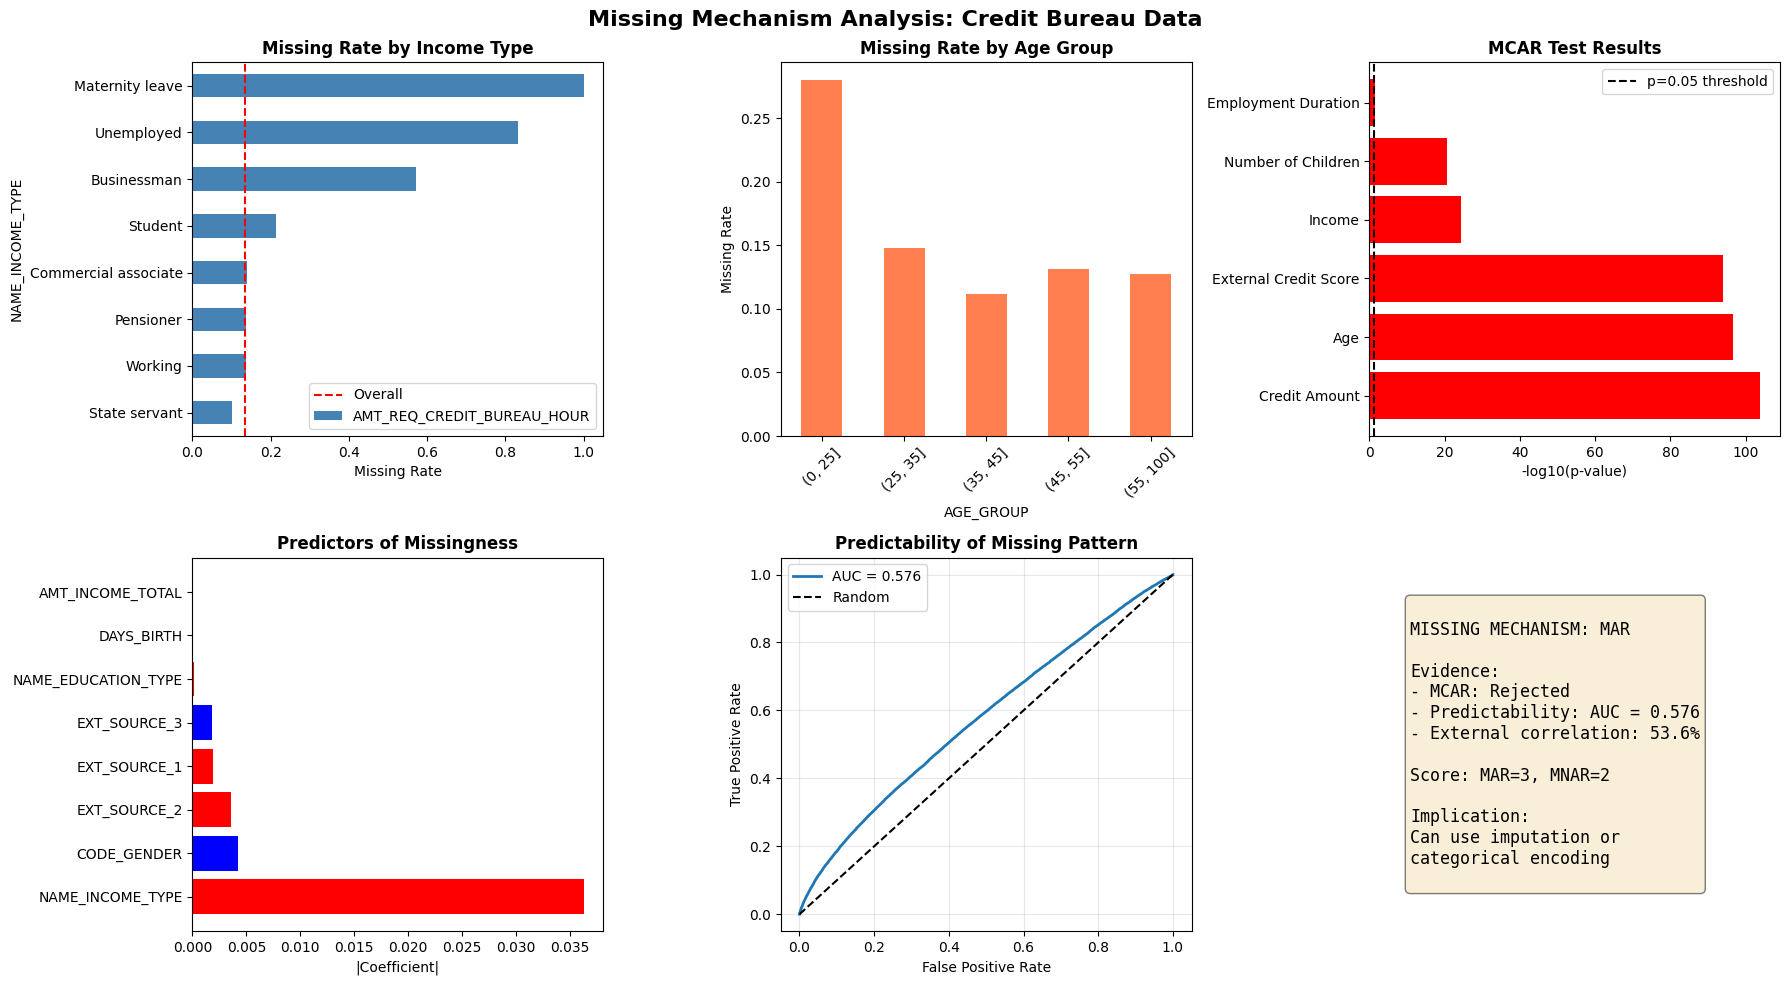

In [80]:
from sklearn.metrics import roc_curve

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Missing Mechanism Analysis: Credit Bureau Data', fontsize=16, fontweight='bold')

# Plot 1: Missing rate by Income Type
ax1 = axes[0, 0]
missing_by_income = df_orig.groupby('NAME_INCOME_TYPE')['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: x.isna().mean()).sort_values()
missing_by_income.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Missing Rate by Income Type', fontweight='bold')
ax1.set_xlabel('Missing Rate')
ax1.axvline(x=df_orig['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().mean(), color='red', linestyle='--', label='Overall')
ax1.legend()

# Plot 2: Missing rate by Age Group
ax2 = axes[0, 1]
df_orig['AGE'] = -df_orig['DAYS_BIRTH'] / 365
df_orig['AGE_GROUP'] = pd.cut(df_orig['AGE'], bins=[0, 25, 35, 45, 55, 100])
missing_by_age = df_orig.groupby('AGE_GROUP')['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: x.isna().mean())
missing_by_age.plot(kind='bar', ax=ax2, color='coral', rot=45)
ax2.set_title('Missing Rate by Age Group', fontweight='bold')
ax2.set_ylabel('Missing Rate')

# Plot 3: T-test results (Uses mcar_df from previous step)
ax3 = axes[0, 2]
mcar_df_plot = mcar_df.sort_values('P-value')
colors = ['red' if p < 0.05 else 'green' for p in mcar_df_plot['P-value']]
ax3.barh(mcar_df_plot['Variable'], -np.log10(mcar_df_plot['P-value']), color=colors)
ax3.axvline(x=-np.log10(0.05), color='black', linestyle='--', label='p=0.05 threshold')
ax3.set_xlabel('-log10(p-value)')
ax3.set_title('MCAR Test Results', fontweight='bold')
ax3.legend()

# Plot 4: Feature importance for predicting missing (Uses feature_importance from previous step)
ax4 = axes[1, 0]
top_features = feature_importance.head(8)
ax4.barh(top_features['Feature'], abs(top_features['Coefficient']), 
         color=['red' if x < 0 else 'blue' for x in top_features['Coefficient']])
ax4.set_title('Predictors of Missingness', fontweight='bold')
ax4.set_xlabel('|Coefficient|')

# Plot 5: ROC curve for missing prediction (Uses y, y_pred_proba, auc from previous step)
ax5 = axes[1, 1]
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
ax5.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.3f}')
ax5.plot([0, 1], [0, 1], 'k--', label='Random')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Predictability of Missing Pattern', fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# Plot 6: Missing mechanism conclusion (Uses score_mar, score_mnar, significant_count, avg_ext_missing, auc from previous step)
ax6 = axes[1, 2]
ax6.axis('off')
verdict_text = f"""
MISSING MECHANISM: {'MAR' if score_mar > score_mnar else 'MNAR'}

Evidence:
- MCAR: {'Rejected' if significant_count >= 3 else 'Cannot reject'}
- Predictability: AUC = {auc:.3f}
- External correlation: {avg_ext_missing:.1%}

Score: MAR={score_mar}, MNAR={score_mnar}

Implication:
{'Can use imputation or\ncategorical encoding' if score_mar > score_mnar else 'Should NOT impute\nKeep as separate category'}
"""
ax6.text(0.1, 0.5, verdict_text, fontsize=12, family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='center')

plt.tight_layout()
plt.savefig('missing_mechanism_analysis.png', dpi=300, bbox_inches='tight')

**Analysis of Missing Values in Credit Bureau Enquiries**

***1. TEST 1 — MCAR Check (t-test between missing / non-missing groups)***

**Reminder:**  
MCAR = Missing Completely At Random → missing values are unrelated to any other variable.  
If MCAR holds, the distribution of observed variables should be similar between missing and non-missing groups.

**Method:**  
- Compare means of 6 key variables between the two groups using independent t-test.  
- Assumes near-normal distribution in each group (CLT applies with large sample: 29k).  

**Results:**  
- All 6 variables: `p-value << 0.05` → **all significant**  
- Example of mean differences:  
  - Income: 153k (missing) vs 171k (non-missing)  
  - Credit: 551k vs 607k  
  - EXT_SOURCE_2: 0.49 vs 0.52  

**Interpretation:**  
- There is a systematic difference between borrowers with Bureau missing vs non-missing.  
- **MCAR is rejected**: missing is not “completely random”.  
- Note: With large samples, t-test is very sensitive → small differences appear significant, but here differences are meaningful.  


***2. TEST 2 — MAR vs MNAR (correlation & chi-square)***

**2.1 EXT_SOURCEs missing rate comparison**
| Variable | Missing Rate (Bureau-missing) | Missing Rate (Bureau-not-missing) | Ratio |
|----------|-------------------------------|-----------------------------------|-------|
| EXT_SOURCE_1 | 60.46% | 55.78% | 1.08x |
| EXT_SOURCE_2 | 0.32%  | 0.21%  | 1.56x |
| EXT_SOURCE_3 | 100%   | 7.35%  | 13.61x |

**Interpretation:**  
- EXT_SOURCE_3 is **100% missing** in Bureau-missing group → strong evidence that Bureau missing correlates with external credit score missing.  
- Indicates missing in Bureau is related to **“no credit history”** — a meaningful business feature, not random measurement error.

**2.2 Chi-square test with `NAME_INCOME_TYPE`**
- `p-value = 0.000` → missing pattern differs by income type  
- Crosstab shows e.g., Maternity leave, Unemployed have higher missing rates.

**2.3 Contract type**
- `p ≈ 0` → missing differs between Cash loans vs Revolving loans  
- Differences are statistically significant, though small in magnitude.

**Summary:**  
- Some missing values **depend on observed variables** (`EXT_SOURCEs`, `Income type`, `Contract type`) → suggestive of **MAR** (Missing At Random).


***3. TEST 3 — Logistic Regression to predict missing***
- Predict `missing_mask` using observed features (categorical label-encoded, numeric median-imputed)  
- **Result:** `AUC = 0.5758` → slightly above random (0.5)  
- Top coefficients small → no strong predictors

**Interpretation:**  
- Although t-tests / chi-square show statistical associations, **predictability is low**  
- Implies:  
  1. Relationship exists but not strong enough to predict missing accurately per record  
  2. Logistic regression with simple encoding may miss nonlinearities, interactions, or hidden variables  
  3. Missing may depend on an **unobserved variable** (e.g., local bureau coverage, credit history)  

**Consequence:**  
- Low AUC → evidence **against strong MAR**; points towards **MNAR** (Missing Not At Random) or weak MAR.


***4. Reconciling the tests — unified interpretation***
1. **MCAR rejected** → missing is **not random**  
2. **Observed variables** (EXT_SOURCEs, income type, contract type) relate to missing → some MAR component  
3. **Low logistic predictability** → missing largely driven by unobserved factors → MNAR  

**Conclusion:**  
- Missing pattern is **informative** (not just data entry error)  
- Partly explainable by observed proxies, but mostly depends on unobserved credit history (`has_credit_history`)  
- Mechanism is practically **MNAR with partial MAR signals** → can be referred to as **“informative missing”**


**Approach to Handle Missing Values in Credit Bureau Enquiries**
- Step 1: Create a missing indicator (flag)

This flag captures whether Bureau data is missing for each applicant, allowing the model to learn patterns associated with applicants who have no credit history, which can be predictive of default risk.

- Step 2: Fill all NA values with 0

Since missing means “no enquiries recorded”, it is reasonable to treat NA as 0 enquiries. This preserves the numeric nature of the features for modeling (Logistic Regression, tree-based models). Combined with the flag, the model can differentiate between actual 0 enquiries and missing due to no Bureau coverage, capturing the informative missing pattern.

In [81]:
df_prep = df_orig.copy()
# Feature 1: Binary flag for missingness
df_prep['HAS_CREDIT_BUREAU_DATA'] = (~df_prep['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()).astype(int)
        
# Feature 2: Fill 0 for all bureau counts
df_prep[credit_bureau_cols] = df_prep[credit_bureau_cols].fillna(0)

## **Handling Outliers**

In [82]:
df_prep['TOTAL_DOC_SUBMITTED'] = df[document_cols].sum(axis=1)
drop_cols = [col for col in df_prep.columns if col.startswith('FLAG_DOCUMENT_')]
df_prep = df_prep.drop(columns=drop_cols)

In [83]:
def encode_bureau_categorical(df, credit_bureau_cols):
    """
    Chuyển thành categorical để capture zero vs non-zero
    """
    
    for col in credit_bureau_cols:
        new_col = col + '_CAT'
        
        # Define bins dựa trên distribution
        if col in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY']:
            # HOUR/DAY: 0 vs >0
            df[new_col] = (df[col] > 0).astype(int)
            df[new_col] = df[new_col].map({0: 'ZERO', 1: 'HAS_ENQUIRY'})
            
        elif col in ['AMT_REQ_CREDIT_BUREAU_WEEK']:
            # WEEK: 0, 1, >1
            df[new_col] = 'ZERO'
            df.loc[df[col] == 1, new_col] = 'ONE'
            df.loc[df[col] > 1, new_col] = 'MULTIPLE'
            
        elif col in ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']:
            # MONTH/QRT: 0, 1-2, >2
            df[new_col] = 'ZERO'
            df.loc[df[col].between(1, 2), new_col] = 'LOW'
            df.loc[df[col] > 2, new_col] = 'HIGH'
            
        else:  # YEAR
            # YEAR: 0, 1-2, 3-5, >5
            df[new_col] = 'ZERO'
            df.loc[df[col].between(1, 2), new_col] = 'LOW'
            df.loc[df[col].between(3, 5), new_col] = 'MEDIUM'
            df.loc[df[col] > 5, new_col] = 'HIGH'

        df = df.drop(col, axis=1)
    
    return df

In [84]:
df_prep = encode_bureau_categorical(df_prep, credit_bureau_cols)

In [85]:
df_prep.columns.to_list()

['ID',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'Y

## **Handling Inconsistencies**

In [92]:
new_cols = [
    'TOTAL_DOC_SUBMITTED',
    'HAS_CREDIT_BUREAU_DATA',
    'AMT_REQ_CREDIT_BUREAU_HOUR_CAT',
    'AMT_REQ_CREDIT_BUREAU_DAY_CAT',
    'AMT_REQ_CREDIT_BUREAU_WEEK_CAT',
    'AMT_REQ_CREDIT_BUREAU_MON_CAT',
    'AMT_REQ_CREDIT_BUREAU_QRT_CAT',
    'AMT_REQ_CREDIT_BUREAU_YEAR_CAT'
]

In [93]:
for col in new_cols:
    print(df_prep[col].value_counts())

TOTAL_DOC_SUBMITTED
1    189128
0     20592
2      5428
3       109
4         1
Name: count, dtype: int64
HAS_CREDIT_BUREAU_DATA
1    186186
0     29072
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_HOUR_CAT
ZERO           214115
HAS_ENQUIRY      1143
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY_CAT
ZERO           214194
HAS_ENQUIRY      1064
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK_CAT
ZERO        209311
ONE           5708
MULTIPLE       239
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON_CAT
ZERO    184746
LOW      26883
HIGH      3629
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_QRT_CAT
ZERO    179823
LOW      33828
HIGH      1607
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_YEAR_CAT
LOW       79573
ZERO      79483
MEDIUM    46353
HIGH       9849
Name: count, dtype: int64


# **STEP 3: Data transformation**

## **Feature scaling**

## **Feature encoding**